## sk-learn

In [1]:
import warnings
warnings.filterwarnings('ignore') # 実行に影響のない　warninig　を非表示にします. 非推奨.

In [2]:
import pandas as pd
wine = pd.read_csv("./data/winequality-red.csv", sep=";") # sepは区切り文字の指定
display(wine.head(10))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [3]:
X = wine[["density"]].values
T = wine["alcohol"].values

In [4]:
X_train = X[:1000, :]
T_train = T[:1000]
X_test = X[1000:, :]
T_test = T[1000:]

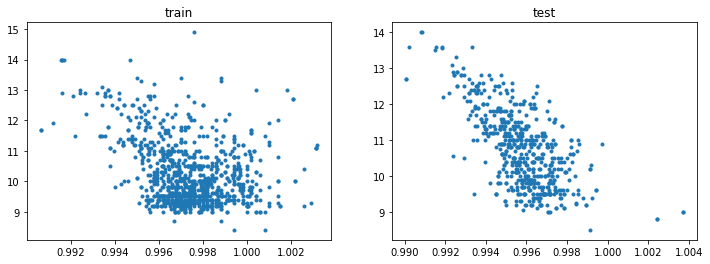

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(ncols=2, figsize=(12, 4))

axes[0].scatter(X_train, T_train, marker=".")
axes[0].set_title("train")
axes[1].scatter(X_test, T_test, marker=".")
axes[1].set_title("test")
fig.show()

train と test の分布がかなり違う.  
予め shuffle して train と test に分割する必要があるようだ.  
XとTの対応関係を崩さず shuffle する方法は多々あるが、その１つが以下.

In [6]:
import numpy as np

np.random.seed(114514) # random　の挙動を固定

p = np.random.permutation(len(X)) # random　な　index のリスト
X = X[p]
T = T[p]

In [7]:
X_train = X[:1000, :]
T_train = T[:1000]
X_test = X[1000:, :]
T_test = T[1000:]

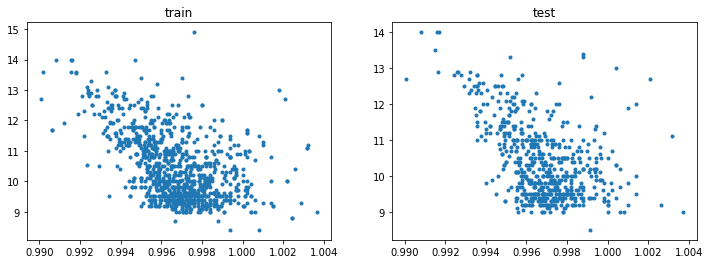

In [8]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 4))

axes[0].scatter(X_train, T_train, marker=".")
axes[0].set_title("train")
axes[1].scatter(X_test, T_test, marker=".")
axes[1].set_title("test")
fig.show()

**今回は**, 目的変数 $t$ を以下の回帰関数で予測する.
$$y=ax+b$$
この時、損失が最小になるように, パラメータ$a,b$を定める必要がある. ここでは二乗損失関数を用いる.
$$\mathrm{L}\left(a, b\right)
=\sum^{N}_{n=1}\left(t_n - y_n\right)^2
=\sum^{N}_{n=1}\left(t_n - ax_x-b\right)^2$$

<span style="color: gray; ">※これは, 目的変数 $t$ が上記の回帰関数 $y$ を中心としたガウス分布に従うという仮定を置いて最尤推定することと等価.</span>　

In [9]:
import sklearn
print(sklearn.__version__)

0.23.2


係数:  [-276.96892969]
切片:  286.5022021188046
決定係数:  0.2466221832716422


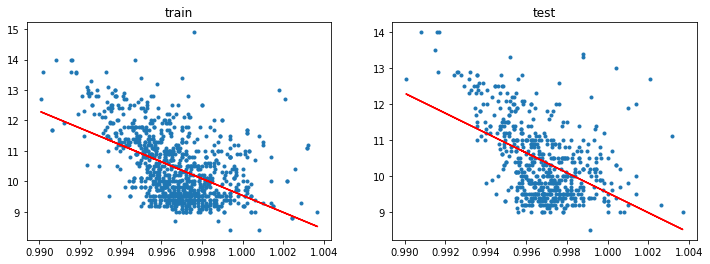

In [10]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()

# 予測モデルを作成
clf.fit(X_train, T_train)
 
# 回帰係数
print("係数: ", clf.coef_)
 
# 切片
print("切片: ", clf.intercept_)
 
# 決定係数
print("決定係数: ", clf.score(X_train, T_train))

fig, axes = plt.subplots(ncols=2, figsize=(12, 4))

axes[0].scatter(X_train, T_train, marker=".")
axes[0].plot(X_train, clf.predict(X_train), color="red")
axes[0].set_title("train")

axes[1].scatter(X_test, T_test, marker=".")
axes[1].plot(X_test, clf.predict(X_test), color="red")
axes[1].set_title("test")
fig.show()

In [11]:
from sklearn import metrics

T_pred = clf.predict(X_test)
print("MAE: ", metrics.mean_absolute_error(T_test, T_pred))
print("MSE: ", metrics.mean_squared_error(T_test, T_pred))
print("決定係数: ", metrics.r2_score(T_test, T_pred))

MAE:  0.7299720309248724
MSE:  0.81826587207931
決定係数:  0.24392800772915346


In [12]:
# 1. データセットを用意する
from sklearn import datasets
iris = datasets.load_iris() # ここではIrisデータセットを読み込む
print(iris.data[0], iris.target[0]) # 1番目のサンプルのデータとラベル

[5.1 3.5 1.4 0.2] 0


In [13]:
# 2.学習用データとテスト用データに分割する
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target)

# 3. 線形SVMという手法を用いて分類する
from sklearn.svm import SVC, LinearSVC
clf = LinearSVC()
clf.fit(X_train, y_train) # 学習

LinearSVC()

In [14]:
# 4. 分類器の性能を測る
y_pred = clf.predict(X_test) # 予測
print(metrics.classification_report(y_true=y_test, y_pred=y_pred)) # 予測結果の評価

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.91      0.95        11
           2       0.92      1.00      0.96        11

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



In [15]:
print('accuracy: ', metrics.accuracy_score(y_test, y_pred))
print('precision:', metrics.precision_score(y_test, y_pred, average='macro'))
print('recall:   ', metrics.recall_score(y_test, y_pred, average='macro'))
print('F1 score: ', metrics.f1_score(y_test, y_pred, average='macro'))

accuracy:  0.9736842105263158
precision: 0.9722222222222222
recall:    0.9696969696969697
F1 score:  0.9696342305037957


In [16]:
from sklearn.decomposition import PCA
from sklearn import datasets
iris = datasets.load_iris()

pca = PCA(n_components=2)
X, y = iris.data, iris.target
X_pca = pca.fit_transform(X) # 次元圧縮
print(X_pca.shape)

(150, 2)


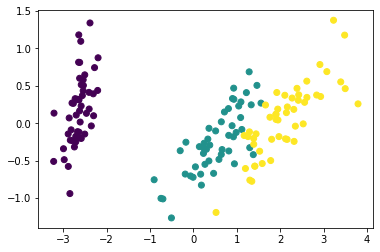

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y);

In [18]:
# 次元圧縮したデータを用いて分類してみる
X_train, X_test, y_train, y_test = train_test_split(X_pca, iris.target)
clf = LinearSVC()
clf.fit(X_train, y_train)
y_pred2 = clf.predict(X_test)

In [19]:
from sklearn import metrics
print(metrics.classification_report(y_true=y_test, y_pred=y_pred2)) # 予測結果の評価

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.92      0.96        12
           2       0.92      1.00      0.96        12

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



In [20]:
from sklearn.datasets import fetch_20newsgroups
categories = ['alt.atheism', 'soc.religion.christian','comp.graphics', 'sci.med']

news_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)

In [21]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
count_vec = CountVectorizer()
X_train_counts = count_vec.fit_transform(news_train.data)

In [22]:
tf_transformer = TfidfTransformer(use_idf=False).fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)

In [23]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tf, news_train.target)

In [24]:
docs = ["God is love.", "I study about Computer Science."]
X_test_counts = count_vec.transform(docs)
X_test_tf = tf_transformer.transform(X_test_counts)
preds = clf.predict(X_test_tf)
for d, label_id in zip(docs, preds):
    print("{} -> {}".format(d, news_train.target_names[label_id]))

God is love. -> soc.religion.christian
I study about Computer Science. -> sci.med


In [25]:
from sklearn.pipeline import Pipeline

text_clf = Pipeline([('countvec', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', MultinomialNB())])

text_clf.fit(news_train.data, news_train.target)

Pipeline(steps=[('countvec', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB())])